# SpikeInterface Tutorial - NWB User Days Workshop  - May 2020


In this tutorial, we will cover the basics of using SpikeInterface for extracellular analysis and spike sorting comparison. We will be using the `spikeinterface` from the SpikeInterface github organization. 

`spikeinterface` wraps 5 subpackages: `spikeextractors`, `spikesorters`, `spiketoolkit`, `spikecomparison`, and `spikewidgets`.

For this analysis, we will be using a real dataset recorded from CA1 region in the hippocampus (recording from [CINPLA](https://www.mn.uio.no/ibv/english/research/sections/fyscell/cinpla/)). We will show how to:

- load the data with spikeextractors package
- load a probe file
- preprocess the signals
- run a popular spike sorting algorithm with different parameters
- curate the spike sorting output using 1) quality metrics (automatic) - 2) [Phy](https://github.com/cortex-lab/phy) 
(manual) - 3) consensus-based
- save the results to NWB!


We recommend creating a new `spiketutorial` conda environment using:

`conda env create -f environment.yml`

Then activate the environment:

`conda activate spiketutorial`

In addition, for the conda environment, you need to install [Phy](https://github.com/cortex-lab/phy) for the manual curation step.

`pip install phy --pre --upgrade`


Alternatively, you can install the requirements you can use the `requirements.txt` in this directory by running the command:

`pip install -r requirements.txt`

(in this case Phy should be automatically installed)


### Downloading the recording

First, we need to download the recording. Feel free to use your own recordings as well later on. 
From this Zenodo [link](https://doi.org/10.5281/zenodo.3825284), you can download the dataset mentioned above (`open-ephys-dataset.zip`). Move the dataset in the current folder and unzip it.
The recording was performed with the mircodrives with 4 tetrodes each (in total 32 channels).


### Importing the modules

Let's now import the `spikeinterface` modules that we need.

In [1]:
import sys
import os
sys.path.append(r'C:\\Users\\ravi\\anaconda3\\envs\\spiketutorial\\lib\\site-packages')

import spikeextractors as se
import spikewidgets as sw
import spiketoolkit as st
import spikesorters as ss
import spikecomparison as sc
import matplotlib.pylab as plt
import numpy as np
%matplotlib notebook
import spiketoolkit as st

09:49:26 [I] klustakwik KlustaKwik2 version 0.2.6


## Loading recording and probe information

In [2]:
se.installed_recording_extractor_list

[spikeextractors.extractors.mdaextractors.mdaextractors.MdaRecordingExtractor,
 spikeextractors.extractors.biocamrecordingextractor.biocamrecordingextractor.BiocamRecordingExtractor,
 spikeextractors.extractors.openephysextractors.openephysextractors.OpenEphysRecordingExtractor,
 spikeextractors.extractors.bindatrecordingextractor.bindatrecordingextractor.BinDatRecordingExtractor,
 spikeextractors.extractors.klustaextractors.klustaextractors.KlustaRecordingExtractor,
 spikeextractors.extractors.kilosortextractors.kilosortextractors.KiloSortRecordingExtractor,
 spikeextractors.extractors.spykingcircusextractors.spykingcircusextractors.SpykingCircusRecordingExtractor,
 spikeextractors.extractors.spikeglxrecordingextractor.spikeglxrecordingextractor.SpikeGLXRecordingExtractor,
 spikeextractors.extractors.phyextractors.phyextractors.PhyRecordingExtractor,
 spikeextractors.extractors.maxonerecordingextractor.maxonerecordingextractor.MaxOneRecordingExtractor,
 spikeextractors.extractors.mea1

In [2]:
recording = se.NeuralynxNrdRecordingExtractor(file_name='F:\\dome_data\\Kilosort_data\\883-11_RawData_300s.nrd', error_checking=False)

In [3]:
print('Num. timepoints = {}'.format(recording.get_num_frames()))

Num. timepoints = 9000000


C:\Users\Ravi\anaconda3\envs\spikeinterface\lib\site-packages\spikeextractors-0.8.4-py3.6.egg\spikeextractors\extractors\neoextractors\neuralynxextractor.py:278: UserWarning: Number of frames returned assumes no errors during recording


<IPython.core.display.Javascript object>


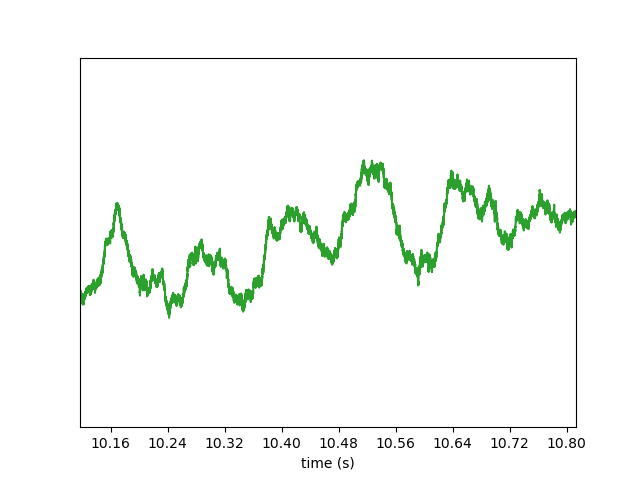

In [5]:
w_ts = sw.plot_timeseries(recording, channel_ids=[0,1,2,3,4], trange=[10,11])

A `RecordingExtractor` object extracts information about channel ids, channel locations (if present), the sampling frequency of the recording, and the extracellular traces (when prompted). The `OpenEphysRecording` is designed specifically for open-ephys datasets.

Here we load information from the recording using the built-in functions from the RecordingExtractor

In [6]:
type(recording)

spikeextractors.extractors.neoextractors.neuralynxextractor.NeuralynxNrdRecordingExtractor

In [4]:
channel_ids = recording.get_channel_ids()
fs = recording.get_sampling_frequency()
num_chan = recording.get_num_channels()

print('Channel ids:', channel_ids)
print('Sampling frequency:', fs)
print('Number of channels:', num_chan)

Channel ids: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159]
Sampling frequency: 30000
Number of channels: 160


The `get_traces()` function returns a NxT numpy array where N is the number of channel ids passed in (all channel ids are passed in by default) and T is the number of frames (determined by start_frame and end_frame).

In [8]:
trace_snippet = recording.get_traces(start_frame=int(fs*0), end_frame=int(fs*2))

C:\Users\Ravi\anaconda3\envs\spikeinterface\lib\site-packages\spikeextractors-0.8.4-py3.6.egg\spikeextractors\extractors\neoextractors\neuralynxextractor.py:278: UserWarning: Number of frames returned assumes no errors during recording


In [9]:
print('Traces shape:', trace_snippet.shape)

Traces shape: (160, 60000)


The `spikewidgets` module includes several convenient plotting functions that can be used to explore the data:

<IPython.core.display.Javascript object>


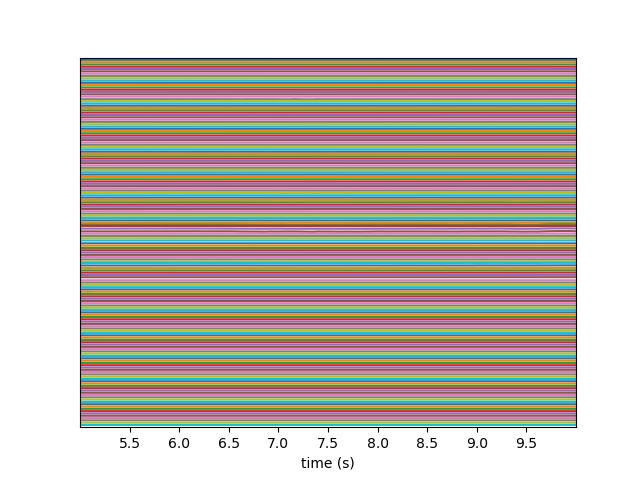

In [10]:
w_ts = sw.plot_timeseries(recording, trange=[5, 10])

We can see that the spikes mainly appear separately on different tetrodes. Each tetrode belongs to a different `group`. We can load the `group` information in two ways:

- using the `set_channel_groups` in your RecordingExtractor (manually loading group information)
- loading a probe file using the `load_probe_file` from RecordingExtractor (automatically loading group information)

Let's use the second option. Probe files (`.prb`) also enable users to change the channel map (reorder the channels) and add channel grouping properties and locations. In this case, our probe file will order the channels in reverse and split them in 4 groups, representing the 4 tetrodes. We'll also add locations to separate the different tetrodes.

In [ ]:
# only works on linux and mac. For windows, open the file using a text editor
!cat tetrode_32.prb

In [5]:
#recording_prb = recording.load_probe_file('tetrode_32.prb')
recording_prb = recording.load_probe_file('tetrode_64_klab.prb')


In [12]:
print('Channels after loading the probe file:', recording_prb.get_channel_ids())
print('Channel groups after loading the probe file:', recording_prb.get_channel_groups())

Channels after loading the probe file: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]
Channel groups after loading the probe file: [ 0  0  0  0  1  1  1  1  2  2  2  2  3  3  3  3  4  4  4  4  5  5  5  5
  6  6  6  6  7  7  7  7  8  8  8  8  9  9  9  9 10 10 10 10 11 11 11 11
 12 12 12 12 13 13 13 13 14 14 14 14 15 15 15 15]


<IPython.core.display.Javascript object>


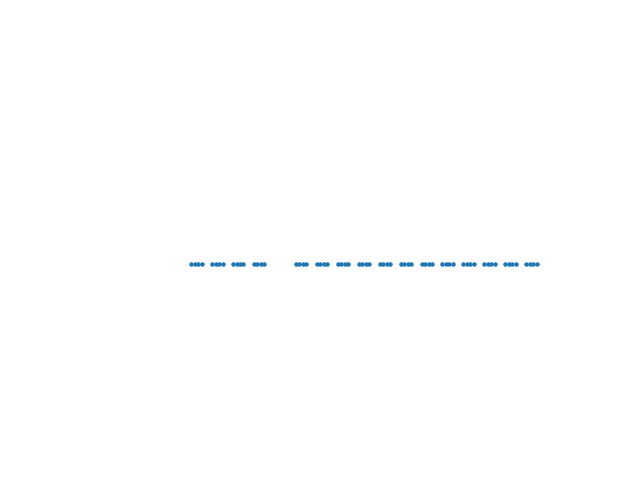

In [13]:
w_elec = sw.plot_electrode_geometry(recording_prb, markersize=5)

### Properties (and features)

For now we have seen that the `RecordingEctractor` can have `group` and `location` *properties*. These are very special properties that can be very important for spike sorting. Anything related to a channel can be saved as a property.

Similarly, for `SortingExtractor` objects, anything related to a unit can be stored as a property. In addition, for `SortingExtractor` objects we can also store anything related to spikes as *features* (e.g. waveforms, as we'll se later).

We can check which properties are in the estractor as follows:

In [14]:
recording.get_channel_groups()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [15]:
print(recording.get_shared_channel_property_names())
print(recording_prb.get_shared_channel_property_names())

['group']
['group', 'location']


Let's add a new property! The first 16 channels are in the left hemisphere, the second 16 are in the right one:

In [6]:
for ch in recording_prb.get_channel_ids():
    #if ch < 16:
        #recording_prb.set_channel_property(ch, property_name='hemisphere', value='left')
    #else:
        recording_prb.set_channel_property(ch, property_name='hemisphere', value='right')

In [17]:
print(recording_prb.get_shared_channel_property_names())

['group', 'hemisphere', 'location']


## Preprocessing recordings


Now that the probe information is loaded we can do some preprocessing using `spiketoolkit`.

We can filter the recordings, rereference the signals to remove noise, discard noisy channels, whiten the data, remove stimulation artifacts, etc. (more info [here](https://spiketoolkit.readthedocs.io/en/latest/preprocessing_example.html)).

For this notebook, let's filter the recordings, remove a noisy channel, and apply common median reference (CMR). All preprocessing modules return new `RecordingExtractor` objects that apply the underlying preprocessing function. This allows users to access the preprocessed data in the same way as the raw data.

Below, we bandpass filter the recording, remove channel 5, and apply common median reference to the original recording.

<IPython.core.display.Javascript object>


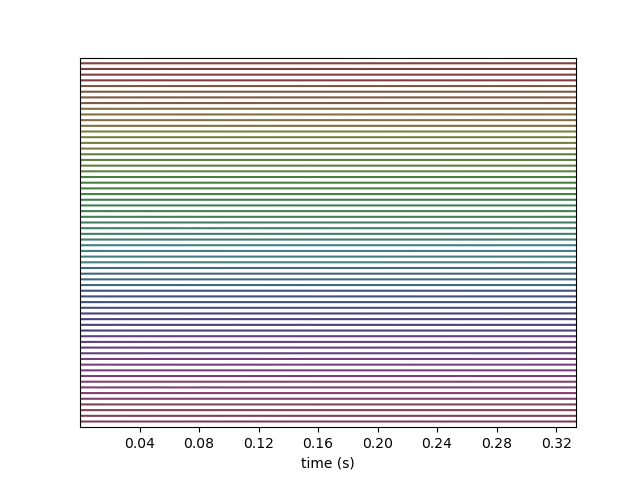

In [7]:
recording_f = st.preprocessing.bandpass_filter(recording_prb, freq_min=600, freq_max=6000)

w = sw.plot_timeseries(recording_f, color_groups=True)

We can see that the first drive is quite active, while the second one is not. For sake of time, we can just focus on the first drive (channels 0-15). We can easily select these channels and get a new extractor using the `SubRecordingExtractor`:

In [8]:
recording_1 = se.SubRecordingExtractor(recording_f, channel_ids=range(16))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3]


<IPython.core.display.Javascript object>


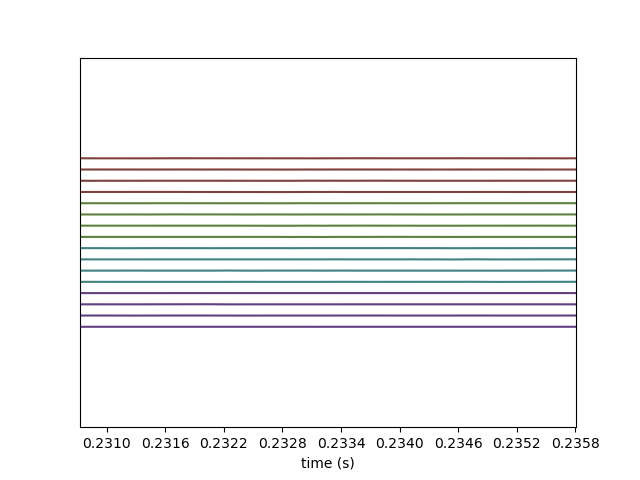

C:\Users\Ravi\anaconda3\envs\spikeinterface\lib\site-packages\spikeextractors-0.8.4-py3.6.egg\spikeextractors\extractors\neoextractors\neuralynxextractor.py:278: UserWarning: Number of frames returned assumes no errors during recording


In [20]:
print(recording_1.get_channel_ids())
print(recording_1.get_channel_groups())
w = sw.plot_timeseries(recording_1, color_groups=True)

As we can notice from the first and second plot, channel 2 seems to be a bit noisy. We can remove it using the `remove_bad_channels` function:

In [9]:
recording_rm_noise = st.preprocessing.remove_bad_channels(recording_1, bad_channel_ids=[])
print(recording_rm_noise.get_channel_ids())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [10]:
recording_cmr = st.preprocessing.common_reference(recording_rm_noise, reference='median')

C:\Users\Ravi\anaconda3\envs\spikeinterface\lib\site-packages\spikeextractors-0.8.4-py3.6.egg\spikeextractors\extractors\neoextractors\neuralynxextractor.py:278: UserWarning: Number of frames returned assumes no errors during recording


We can plot the traces after removing the bad channel and applying CMR:

<IPython.core.display.Javascript object>


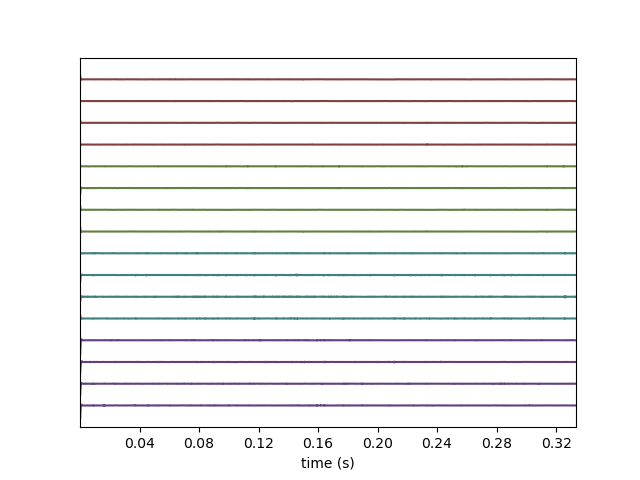

In [23]:
w = sw.plot_timeseries(recording_cmr, color_groups=True)

In [24]:
print('Channel ids for CMR recordings:', recording_cmr.get_channel_ids())
print('Channel groups for CMR recordings:', recording_cmr.get_channel_groups())

Channel ids for CMR recordings: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Channel groups for CMR recordings: [0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3]


Since we are going to spike sort the data, let's first cut out a 2-minute recording, to speed up computations.

In [11]:
#recording_sub = se.SubRecordingExtractor(recording_cmr, start_frame=200*fs, end_frame=320*fs)
recording_sub = se.SubRecordingExtractor(recording_cmr, start_frame=200*fs, end_frame=9000000)

## Caching 

All operations in SpikeInterface are *lazy*, meaning that they are not performed if not needed. This is why the creation of our filter recording was almost instantaneous. However, to speed up further processing, we might want to **cache** it to a file and perform those operations (eg. filters, CMR, etc.) at once. This is particularly important if we are going to extract waveforms, templates, pca scores, or in general *post-process* the results.

In [12]:
recording_cache = se.CacheRecordingExtractor(recording_sub,None,'F:\Documents\gitrepos\klab_spikeinterface\spiketutorials\\NWB_Developer_Breakout_Session_2020\preprocessed_data.dat') 

The cached recording has all the previously loaded information:

In [27]:
print(recording_cache.get_channel_ids())
print(recording_cache.get_channel_groups())
print(recording_cache.get_num_frames() / recording_cache.get_sampling_frequency())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3]
100.0


Under the hood, this convenient function is retrieving all the traces (in chunks, to save up some memory), applying the preprocessing steps, and dumping them to a binary temporary file:

In [28]:
recording_cache.filename

'F:\\Documents\\gitrepos\\klab_spikeinterface\\spiketutorials\\NWB_Developer_Breakout_Session_2020\\preprocessed_data.dat'

Note that all extractors (including sorting extractors), have a temporary folder associated with it, that enables SpikeInterface to cache several data (including waveforms) and be gentle on RAM usage:

In [29]:
recording_cache.get_tmp_folder()

WindowsPath('C:/Users/Ravi/AppData/Local/Temp/tmp5feb0pfl')

The temporary files in the tmp folder, are *temporary*, and they will be deleted when the Python session is closed (or the object destroyed). To prevent this, we can simply move the binary file to a custom location:

In [ ]:
recording_cache.move_to('preprocessed_data.dat') 
print(recording_cache.filename)

Alternatively, we could have passed the `save_path` argument to the `se.CacheRecordingExtractor` directly.

## Dumping

If we now closed the Python session, we would have a nice `.dat` file, but no information on how to open it! 
In order to save the state of an extractor, we can use the **dumping** mechanism.
Each extractor can be converted to a dictionary, which holds the path to the data file and all relevant information:

In [30]:
recording_cache.dump_to_dict()

{'class': 'spikeextractors.extractors.bindatrecordingextractor.bindatrecordingextractor.BinDatRecordingExtractor',
 'module': 'spikeextractors',
 'kwargs': {'file_path': 'F:\\Documents\\gitrepos\\klab_spikeinterface\\spiketutorials\\NWB_Developer_Breakout_Session_2020\\preprocessed_data.dat',
  'sampling_frequency': 30000,
  'numchan': 16,
  'dtype': 'int32',
  'recording_channels': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
  'time_axis': 0,
  'geom': None,
  'offset': 0,
  'gain': None,
  'is_filtered': True},
 'key_properties': {'group': array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]),
  'location': array([[0.00000000e+000, 0.00000000e+000, 5.24132961e-312],
         [1.00000000e+000, 0.00000000e+000, 1.48539706e-312],
         [2.00000000e+000, 0.00000000e+000, 2.86469433e-312],
         [3.00000000e+000, 0.00000000e+000, 6.59940692e-312],
         [6.00000000e+000, 0.00000000e+000, 9.08214199e-312],
         [7.00000000e+000, 0.00000000e+000, 1.35807731e-311],

We can now dump our extractor object, so it can be loaded in a future session. We can dump either to `.json` or to `.pkl`. Dumping to pickle also allow us to store properties (other than group and locations) and features (for `SortingExtractor` objects).

In [31]:
recording_cache.dump_to_pickle('recording.pkl')

In another session, we can pick up from where we left by loading the extractor from the pickle file:

In [32]:
recording_loaded = se.load_extractor_from_pickle('recording.pkl')

<IPython.core.display.Javascript object>


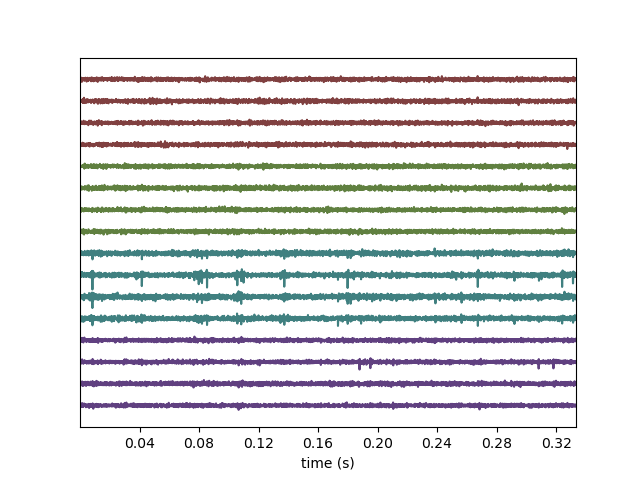

In [33]:
w = sw.plot_timeseries(recording_loaded, color_groups=True)

In [34]:
recording_loaded.get_shared_channel_property_names()

['group', 'hemisphere', 'location']

**IMPORTANT**: the same caching/dumping mechanisms are available also for all SortingExtractor

# Spike sorting

We can now run spike sorting on the above recording. We will use `klusta` and `ironclust` for this demonstration, to show how easy SpikeInterface makes it to interchengably run different sorters :)

Let's first check the installed sorters in spiketoolkit to see if klusta is available. Then we can check the `klusta` default parameters.
We will sort the bandpass cached filtered recording the `recording_cache` object.

In [ ]:
ss.installed_sorters()

In [ ]:
ss.available_sorters()

Instructions to install new sorters are available [here](https://spikeinterface.readthedocs.io/en/latest/sortersinfo.html). 

We can retrieve the parameters associated to any sorter with the `get_default_params()` function from the `spikesorters` module:

In [ ]:
ss.get_default_params('klusta')

In [ ]:
ss.run_sorter?

In [ ]:
ss.run_klusta?

We will set the `adjacency_radius` to 5 microns as electrodes belonging to the same tetrode are within this distance.

In [ ]:
# run spike sorting on entire recording
sorting_KL_all = ss.run_klusta(recording_cache, output_folder='results_all_klusta', adjacency_radius=5)
print('Found', len(sorting_KL_all.get_unit_ids()), 'units')

### Spike sorting by group

Since we have 4 tetrodes and we know that they are physically apart, we would like to sort them separately.

Here is how it's done in SpikeInterface:

![](sort_by_group.png)

In [ ]:
# run spike sorting by group (add picture)
sorting_KL = ss.run_klusta(recording_cache, adjacency_radius=50, 
                           output_folder='results_split_klusta', 
                           grouping_property='group', parallel=True)
print('Found', len(sorting_KL.get_unit_ids()), 'units')

In [ ]:
print(type(sorting_KL))

In [ ]:
sorting_KL.sortings

### Installing IronClust (requires MATLAB)

For MATLAB-based sorters, all you need to do is cloning the sorter repo and point it to SpikeInterface:

Let's clone ironclust in the current directory:

In [ ]:
!git clone https://github.com/jamesjun/ironclust

Now all we have to tell the IronClustSorter class where is the ironclust repo:

In [13]:
ss.IronClustSorter.set_ironclust_path('.\ironclust')
ss.Kilosort2Sorter.set_kilosort2_path('F:\Documents\gitrepos\Kilosort2-master')
#sorting_KS = ss.run_kilosort2(recording, output_folder='tmp_KS')
#  print('Units found with Kilosort:', sorting_KS.get_unit_ids())

Setting IRONCLUST_PATH environment variable for subprocess calls to: F:\Documents\gitrepos\klab_spikeinterface\spiketutorials\NWB_Developer_Breakout_Session_2020\ironclust
Setting KILOSORT2_PATH environment variable for subprocess calls to: F:\Documents\gitrepos\Kilosort2-master


Note that we can also set a global environment variable called `IRONCLUST_PATH`. In that case we don't need to set the path in each session because the sorter class looks for this environment variable.

Now ironclust should be installed and we can run it:

In [25]:
ss.IronClustSorter.ironclust_path

'F:\\Documents\\gitrepos\\klab_spikeinterface\\spiketutorials\\NWB_Developer_Breakout_Session_2020\\ironclust'

In [26]:
ss.Kilosort2Sorter.kilosort2_path

'F:\\Documents\\gitrepos\\Kilosort2-master'

In [27]:
ss.Kilosort2Sorter.installed

True

In [ ]:
ss.installed_sorters()

In [ ]:
# run spike sorting by group
sorting_IC = ss.run_ironclust(recording_cache, 
                              output_folder='results_split_ic', 
                              grouping_property='group', parallel=True)
print('Found', len(sorting_IC.get_unit_ids()), 'units')

In [ ]:
sorting_KS2 = ss.run_kilosort2(recording_cache,output_folder='results_split_ks2', grouping_property='group')
#sorting_KS2 = ss.run_kilosort2(recording_cache,output_folder='results_split_ks2')
print('Units found with Kilosort2', sorting_KS2.get_unit_ids())

In [14]:
sorting_SC = ss.run_spykingcircus(recording, output_folder='tmp_SC')
# print('Units found with Spyking Circus:', sorting_SC.get_unit_ids())

WARNING! No channel location given. Add dummy location.
RUNNING SHELL SCRIPT: F:\Documents\gitrepos\klab_spikeinterface\spiketutorials\NWB_Developer_Breakout_Session_2020\tmp_SC\run_spykingcircus.bat


SpikeSortingError: Spike sorting failed: spykingcircus returned a non-zero exit code. You can inspect the runtime trace in the spykingcircus.log of the output folder.'

The spike sorting returns a `SortingExtractor` object. Let's see some of its functions:

In [37]:
print('Units', sorting_KS2.get_unit_spike_train(13))

Units [ 175510  179963  185969  332634  338953  356287  378697  535827  591753
  644272  750437  819474  820659  851267  876948 1440126 1640748 1852472
 1855491 2134511 2155051 2166826 2630469 2802951 2949194 2949843 2950341
 2951141 2951570 2951683 2951753 2952364 2952539 2952706 2953081 2953170
 2953453 2953619 2953738 2953785 2954011 2954135 2954865 2954939 2955050
 2955154 2955223 2955401 2955440 2956116 2956512 2956696 2957022 2957116
 2957140 2957684 2957815 2957949 2958108 2958946 2959331 2959719 2959757
 2960217 2960399 2960587 2961211 2961717 2961777 2962232 2962692 2962817
 2963052 2963349 2963582 2964031 2964457 2964486 2964527 2964913 2965072
 2965349 2965510 2965592 2965665 2965844 2966018 2966263 2966399 2966507
 2966563 2966728 2967578 2967797 2968073 2968188 2968216 2968315 2968568
 2968846 2969031 2969067 2969187 2969544 2970088 2970432 2970465 2970552
 2970718 2970783 2970802 2970873 2971680 2971809 2972423 2972719 2972949
 2973041 2973456 2973639 2973901 2973995 2974

We can use `spikewidgets` functions to quickly visualize some unit features:

<IPython.core.display.Javascript object>


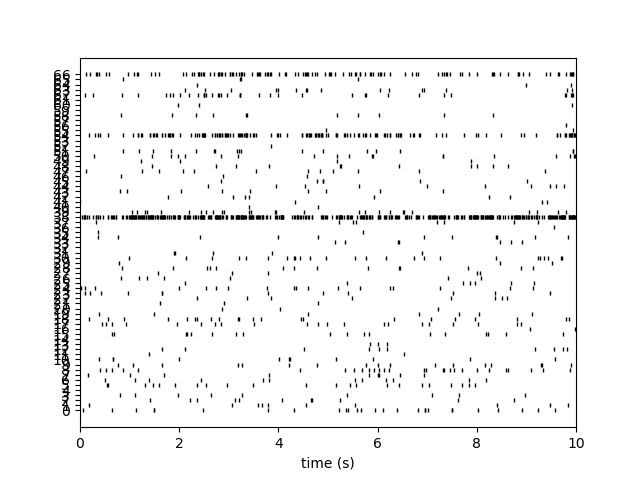

In [38]:
w_rs = sw.plot_rasters(sorting_KS2, trange=[0,10])

## Postprocessing

The `postprocessing` submodule of `spiketoolkit` allow us to extract information from the combination of the recording and sorting extractors. For example, we can extract waveforms, templates, maximum channels and pca scores. In addition, we can also compute waveform features that could be used for further processing, e.g. classyfing excitatory-inhibitory neurons.

To extract the waveforms, we can run:

In [39]:
waveforms = st.postprocessing.get_unit_waveforms(recording_cache, sorting_KS2, verbose=True)

Waveform 1/67
Waveform 2/67
Waveform 3/67
Waveform 4/67
Waveform 5/67
Waveform 6/67
Waveform 7/67
Waveform 8/67
Waveform 9/67
Waveform 10/67
Waveform 11/67
Waveform 12/67
Waveform 13/67
Waveform 14/67
Waveform 15/67
Waveform 16/67
Waveform 17/67
Waveform 18/67
Waveform 19/67
Waveform 20/67
Waveform 21/67
Waveform 22/67
Waveform 23/67
Waveform 24/67
Waveform 25/67
Waveform 26/67
Waveform 27/67
Waveform 28/67
Waveform 29/67
Waveform 30/67
Waveform 31/67
Waveform 32/67
Waveform 33/67
Waveform 34/67
Waveform 35/67
Waveform 36/67
Waveform 37/67
Waveform 38/67
Waveform 39/67
Waveform 40/67
Waveform 41/67
Waveform 42/67
Waveform 43/67
Waveform 44/67
Waveform 45/67
Waveform 46/67
Waveform 47/67
Waveform 48/67
Waveform 49/67
Waveform 50/67
Waveform 51/67
Waveform 52/67
Waveform 53/67
Waveform 54/67
Waveform 55/67
Waveform 56/67
Waveform 57/67
Waveform 58/67
Waveform 59/67
Waveform 60/67
Waveform 61/67
Waveform 62/67
Waveform 63/67
Waveform 64/67
Waveform 65/67
Waveform 66/67
Waveform 67/67


In [40]:
waveforms[1].shape

(83, 16, 180)

In [42]:
len(sorting_KS2.get_unit_spike_train(0))

322

Similarly, we can get templates, maximum channels, and pca scores. 
Whem these are computed, they are automatically stored in the `SortingExtractor` object, so that they don't need to be recomputed. 

Each waveform is associated with a specific spike, so they are saved as spike *features*:


In [41]:
sorting_KS2.get_shared_unit_spike_feature_names()

['amplitudes', 'pc_features', 'waveforms', 'waveforms_idxs']

You may have noticed that 300 waveforms were extracted from the spike train of the first unit. However, it has more spikes:

It can be convenient to only compute a subset of waveforms to speed up the calculation. The `waveform_idxs` property contains the spike indexes associated with the waveforms.

In [43]:
print(sorting_KS2.get_unit_spike_features(0, 'waveforms_idxs'))

[  0   1   2   3   4   5   6   7   8  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  26  27  28  29  30  31  32  33  34  35  36  37
  38  40  41  42  43  44  45  46  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  71  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 166 167 168 169 170 171
 173 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
 194 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 243 244 245 246 247 248 249 250
 252 253 254 255 256 257 258 259 260 261 262 263 26

Since waveforms are already computed, the next time we (or another function - e.g. `get_unit_templates()`) call it it will just return the stored waveforms.

In [44]:
waveforms = st.postprocessing.get_unit_waveforms(recording_cache, sorting_KS2, verbose=True)

Lighthing fast! 

If we want to recompute the waveforms, for example because we want to extract the waveforms divided by group, we can use the `recompute_info` argument (available for all `postprocessing`, `validation`, and `curation` functions):

In [49]:
waveforms_group = st.postprocessing.get_unit_waveforms(recording_cache, sorting_KS2, grouping_property='group', recompute_info=True,verbose=True, save_property_or_features=True)
#waveforms_group = st.postprocessing.get_unit_waveforms(recording_cache, sorting_KS2, recompute_info=True,verbose=True, save_property_or_features=True)

Waveform 1/67
Waveform 2/67
Waveform 3/67
Waveform 4/67
Waveform 5/67
Waveform 6/67
Waveform 7/67
Waveform 8/67
Waveform 9/67
Waveform 10/67
Waveform 11/67
Waveform 12/67
Waveform 13/67
Waveform 14/67
Waveform 15/67
Waveform 16/67
Waveform 17/67
Waveform 18/67
Waveform 19/67
Waveform 20/67
Waveform 21/67
Waveform 22/67
Waveform 23/67
Waveform 24/67
Waveform 25/67
Waveform 26/67
Waveform 27/67
Waveform 28/67
Waveform 29/67
Waveform 30/67
Waveform 31/67
Waveform 32/67
Waveform 33/67
Waveform 34/67
Waveform 35/67
Waveform 36/67
Waveform 37/67
Waveform 38/67
Waveform 39/67
Waveform 40/67
Waveform 41/67
Waveform 42/67
Waveform 43/67
Waveform 44/67
Waveform 45/67
Waveform 46/67
Waveform 47/67
Waveform 48/67
Waveform 49/67
Waveform 50/67
Waveform 51/67
Waveform 52/67
Waveform 53/67
Waveform 54/67
Waveform 55/67
Waveform 56/67
Waveform 57/67
Waveform 58/67
Waveform 59/67
Waveform 60/67
Waveform 61/67
Waveform 62/67
Waveform 63/67
Waveform 64/67
Waveform 65/67
Waveform 66/67
Waveform 67/67


In [45]:
st.postprocessing.get_waveforms_params()
    

OrderedDict([('grouping_property', None),
             ('ms_before', 3.0),
             ('ms_after', 3.0),
             ('dtype', None),
             ('compute_property_from_recording', False),
             ('n_jobs', None),
             ('max_channels_per_waveforms', None)])

In [46]:
waveAmp = st.postprocessing.get_unit_amplitudes(recording_cache, sorting_KS2, unit_ids=sorting_KS2.get_unit_ids(), channel_ids=range(16), return_idxs=False, save_property_or_features=True,recompute_info=True,verbose=True)

In [50]:
import pickle
with open('unitAmplitude.pkl', 'wb') as amp_dictionary_file:
    pickle.dump(waveAmp, amp_dictionary_file)
    
with open('unitWaveforms.pkl', 'wb') as wav_dictionary_file:
    pickle.dump(waveforms_group, wav_dictionary_file)

In [51]:
with open('unitAmplitude.pkl', 'rb') as config_dictionary_file:
 
    # Step 3
    config_dictionary = pickle.load(config_dictionary_file)
 
    # After config_dictionary is read from file
    print((config_dictionary))    

[memmap([ 1460,  1413,  1959,   992,  1679,  2050,  1493,  1029,  1257,
         1308,  2675,  1518,  1777,  1269,  1581,  1246,  1540,  1206,
         1461,  1976,  1359,  1581,   889,  1084,  2354,  3350,  1086,
         2115,  1941,  4181,  3990,  1780,  2145,  3363,  1515,  1439,
         1640,  1078,  2266,  1529,  1632,   954,  1643,  1255,  1305,
         2024,  1465,  1629,  1481,  1020,  1218,  1209,  1699,  2372,
         1620,  1802,  2808,  1736,  1205,  1507,  1078,  1447,  1554,
        11591,  1473,  1432,  1972,  2004,  1564,  1559,  1266,  1699,
          931,  1311,  1306,  1383,  1653,  1702,  3216,  2169,  1244,
         1294,  1888,  1790,  2049,  2009,  3661,  1316,  1382,  1705,
         1849,  1963,  2002,  1111,  1586,  2205,  1690,  3261,  1663,
         1864, 11636,  1632, 27389, 46922, 46922, 46922,  1309,  1529,
         1376,  1494,  1267,  1630,  1259,  1053,  1762,  1099,  1256,
         1336,  2364,  1569,  1241,  1589,  1584,  1258,  1214,  1491,
     

In [52]:
sorting_KS2.get_shared_unit_property_names()

['Amplitude',
 'ContamPct',
 'KSLabel',
 'group',
 'quality',
 'waveforms_channel_idxs']

In [53]:
for wf in waveforms_group:
    print(wf.shape)

(300, 4, 180)
(83, 4, 180)
(243, 4, 180)
(112, 4, 180)
(14, 4, 180)
(99, 4, 180)
(68, 4, 180)
(29, 4, 180)
(300, 4, 180)
(141, 4, 180)
(137, 4, 180)
(18, 4, 180)
(300, 4, 180)
(200, 4, 180)
(21, 4, 180)
(197, 4, 180)
(71, 4, 180)
(300, 4, 180)
(300, 4, 180)
(233, 4, 180)
(53, 4, 180)
(41, 4, 180)
(169, 4, 180)
(136, 4, 180)
(178, 4, 180)
(48, 4, 180)
(93, 4, 180)
(78, 4, 180)
(99, 4, 180)
(34, 4, 180)
(193, 4, 180)
(78, 4, 180)
(20, 4, 180)
(79, 4, 180)
(134, 4, 180)
(51, 4, 180)
(48, 4, 180)
(103, 4, 180)
(300, 4, 180)
(300, 4, 180)
(133, 4, 180)
(30, 4, 180)
(210, 4, 180)
(270, 4, 180)
(210, 4, 180)
(77, 4, 180)
(68, 4, 180)
(81, 4, 180)
(89, 4, 180)
(300, 4, 180)
(300, 4, 180)
(300, 4, 180)
(11, 4, 180)
(10, 4, 180)
(300, 4, 180)
(57, 4, 180)
(63, 4, 180)
(48, 4, 180)
(300, 4, 180)
(41, 4, 180)
(82, 4, 180)
(27, 4, 180)
(300, 4, 180)
(292, 4, 180)
(96, 4, 180)
(150, 4, 180)
(300, 4, 180)


<IPython.core.display.Javascript object>


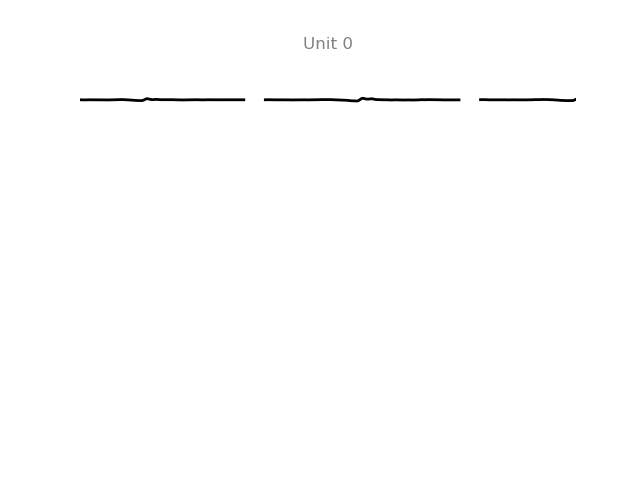

In [55]:
w_wf = sw.plot_unit_templates(sorting=sorting_KS2, recording=recording_cache, unit_ids=[0])

In [56]:
st.postprocessing.get_template_features_list()

['peak_to_valley',
 'halfwidth',
 'peak_trough_ratio',
 'repolarization_slope',
 'recovery_slope']

In [57]:
features = st.postprocessing.compute_unit_template_features(recording_cache, sorting_KS2, as_dataframe=True, 
                                                            upsampling_factor=1,save_property_or_features=True)
display(features)

,peak_to_valley,halfwidth,peak_trough_ratio,repolarization_slope,recovery_slope
0,[0.0006000000000000001],[0.00030000000000000003],[-0.535635236830456],[4593750.0],[-1536506.4935064933]
1,[0.0008],[0.0012666666666666668],[-0.3079416531604538],[2196999.9999999995],[-202402.59740259737]
2,[0.0006666666666666668],[0.0013333333333333335],[-0.27866473149492016],[2102307.692307693],[-267896.10389610386]
3,[0.00030000000000000003],[0.0012666666666666668],[-1.5954887218045113],[5278500.000000012],[-2254597.4025974027]
4,[0.0005333333333333334],[0.0015333333333333334],[-1.032410135533294],[25219499.999999963],[-10228889.610389607]
...,...,...,...,...,...
62,[0.00013333333333333334],[0.00013333333333333334],[-0.4793650793650794],[23279999.99999998],[-781188.3116883119]
63,[0.0005666666666666667],[0.0002],[-0.11954765751211632],[3403426.5734265745],[-254181.81818181812]
64,[0.0007333333333333333],[0.0003333333333333334],[-0.1842227378190255],[3082657.342657342],[-186915.58441558434]
65,[0.0021000000000000003],[0.00013333333333333334],[-0.07909604519774012],[2577954.5454545445],[-122883.11688311695]


For more information about these waveform features, we refer to this [documentation](https://github.com/AllenInstitute/ecephys_spike_sorting/tree/master/ecephys_spike_sorting/modules/mean_waveforms) from the Allen Institute.

## Validation

The `spiketoolkit` package also provides several functions to compute qualitity metrics about the spike sorting results through the `validation` module.

Let's see what metrics are available:



In [58]:
st.validation.get_quality_metrics_list()

['num_spikes',
 'firing_rate',
 'presence_ratio',
 'isi_violation',
 'amplitude_cutoff',
 'snr',
 'max_drift',
 'cumulative_drift',
 'silhouette_score',
 'isolation_distance',
 'l_ratio',
 'd_prime',
 'nn_hit_rate',
 'nn_miss_rate']

We can either compute one metric at a time, or compute a subset of metrics using the `compute_quality_metrics` function:

In [59]:
duration = recording.get_num_frames()
isi_violations = st.validation.compute_isi_violations(sorting_KS2, duration_in_frames=duration)
print('ISI violations:', isi_violations)

snrs = st.validation.compute_snrs(sorting_KS2, recording_cache)
print('SNRs:', snrs)

ISI violations: [1.28379565e+01 1.46789948e+01 1.19877588e+01 2.50719658e+01
 3.61155698e+03 9.76921584e+01 6.75809282e+01 0.00000000e+00
 2.99998800e+00 1.57016089e+01 3.23267927e+01 3.12109863e+02
 8.92913725e+00 4.04494382e+01 1.68072458e+03 1.59563859e+01
 2.12399907e+01 1.89457683e+01 9.73832665e+00 1.69090435e+01
 0.00000000e+00 6.01568087e+01 1.41624727e+01 1.64019673e+01
 0.00000000e+00 4.77899790e+01 0.00000000e+00 3.32424706e+01
 0.00000000e+00 2.78577398e+02 2.71480028e+00 1.66212353e+01
 2.52808989e+02 6.48124310e+01 0.00000000e+00 7.77574744e+01
 8.77808989e+01 1.90637375e+01 3.05855865e-01 1.18020606e+00
 1.14335005e+01 1.12359551e+02 4.58610410e+00 1.10972396e+01
 4.58610410e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.12727803e+00 2.01939721e+01 1.02592723e+01
 1.67146439e+03 3.03370787e+03 6.60541811e-01 3.11245292e+01
 1.01913425e+02 1.31671348e+02 0.00000000e+00 2.40627235e+02
 0.00000000e+00 1.49591118e+02 4.21097661e+00 2.37201153e+00
 4.48193

C:\Users\Ravi\anaconda3\envs\spikeinterface\lib\site-packages\spikeextractors-0.8.4-py3.6.egg\spikeextractors\extractors\neoextractors\neuralynxextractor.py:278: UserWarning: Number of frames returned assumes no errors during recording


In [60]:
quality_metrics = st.validation.compute_quality_metrics(sorting_KS2, recording_cache, 
                                                        metric_names=['isi_violation', 'snr'], as_dataframe=True)
display(quality_metrics)

,isi_violation,snr
0,4.279319,2.654522
1,4.892998,1.741479
2,3.995920,2.324322
3,8.357322,2.493535
4,1203.852327,10.293763
...,...,...
62,1.403659,3.688672
63,0.790671,2.899413
64,14.939774,4.463878
65,2.996255,2.692145


For more information about these waveform features, we refer to this [documentation](https://allensdk.readthedocs.io/en/latest/_static/examples/nb/ecephys_quality_metrics.html) from the Allen Institute.

## Curation

### 1) Manual curation using Phy

To perform manual curation we will export the data to Phy. 

In [15]:
st.postprocessing.export_to_phy(recording_cache, sorting_KS2, output_folder='phy_KS2',grouping_property='group', recompute_info=True,verbose=True)
#st.postprocessing.export_to_phy(recording_cache, sorting_KS2, output_folder='phy_KS2', verbose=True)

Converting to Phy format
Waveform 1/67
Waveform 2/67
Waveform 3/67
Waveform 4/67
Waveform 5/67
Waveform 6/67
Waveform 7/67
Waveform 8/67
Waveform 9/67
Waveform 10/67
Waveform 11/67
Waveform 12/67
Waveform 13/67
Waveform 14/67
Waveform 15/67
Waveform 16/67
Waveform 17/67
Waveform 18/67
Waveform 19/67
Waveform 20/67
Waveform 21/67
Waveform 22/67
Waveform 23/67
Waveform 24/67
Waveform 25/67
Waveform 26/67
Waveform 27/67
Waveform 28/67
Waveform 29/67
Waveform 30/67
Waveform 31/67
Waveform 32/67
Waveform 33/67
Waveform 34/67
Waveform 35/67
Waveform 36/67
Waveform 37/67
Waveform 38/67
Waveform 39/67
Waveform 40/67
Waveform 41/67
Waveform 42/67
Waveform 43/67
Waveform 44/67
Waveform 45/67
Waveform 46/67
Waveform 47/67
Waveform 48/67
Waveform 49/67
Waveform 50/67
Waveform 51/67
Waveform 52/67
Waveform 53/67
Waveform 54/67
Waveform 55/67
Waveform 56/67
Waveform 57/67
Waveform 58/67
Waveform 59/67
Waveform 60/67
Waveform 61/67
Waveform 62/67
Waveform 63/67
Waveform 64/67
Waveform 65/67
Waveform 

In [30]:
%%capture --no-display
!phy template-gui phy_KS2/params.py

After curating the results we can reload it using the `PhySortingExtractor`:

In [ ]:
sorting_KS2_phy_curated = se.PhySortingExtractor('phy_KS2/', exclude_cluster_groups=['noise'])

In [ ]:
print(len(sorting_KS2_phy_curated.get_unit_ids()))

In [ ]:
st.postprocessing.export_to_phy(recording_cache, 
                                sorting_KL, output_folder='phy_KL',
                                grouping_property='group', verbose=True, recompute_info=True)

In [ ]:
%%capture --no-display
!phy template-gui phy_KL/params.py

### 2) Automatic curation based on quality metrics

In [ ]:
snr_thresh = 5
isi_viol_thresh = 0.5

In [ ]:
sorting_auto = st.curation.threshold_isi_violations(sorting_KL, isi_viol_thresh, 'greater', duration)

In [ ]:
len(sorting_auto.get_unit_ids())

In [ ]:
sorting_auto = st.curation.threshold_snrs(sorting_auto, recording_cache, snr_thresh, 'less')

In [ ]:
len(sorting_auto.get_unit_ids())

### 3) Consensus-based curation 

Can we combine the output of multiple sorters to curate the spike sorting output?

To answer this question we can use the `comparison` module.
We first compare and match the output spike trains of the different sorters, and we can then extract a new `SortingExtractor` with only the units in agreement.

In [ ]:
mcmp = sc.compare_multiple_sorters([sorting_KL, sorting_IC], ['KL', 'IC'])

In [ ]:
w = sw.plot_multicomp_agreement(mcmp)
w = sw.plot_multicomp_agreement_by_sorter(mcmp)

In [ ]:
agreement_sorting = mcmp.get_agreement_sorting(minimum_agreement_count=2)

In [ ]:
isinstance(agreement_sorting, se.SortingExtractor)

In [ ]:
agreement_sorting.get_unit_ids()

In [ ]:
st.postprocessing.export_to_phy(recording_cache, 
                                agreement_sorting, output_folder='phy_AGR',
                                grouping_property='group', verbose=True, recompute_info=True)

In [ ]:
%%capture --no-display
!phy template-gui phy_AGR/params.py

## Save to / load from NWB

(Recording is BROKEN, but will be fixed very soon!)

In [ ]:
# se.NwbRecordingExtractor.write_recording(recording_cache, 'si_tutorial.nwb')

In [ ]:
# se.NwbSortingExtractor.write_sorting(sorting_IC, 'si_tutorial4.nwb')

In [ ]:
# recording_nwb = se.NwbRecordingExtractor('si_tutorial.nwb')
# sorting_nwb = se.SortingExtractor('si_tutorial.nwb')